## 캐글 필사 [주가 분석]

* data 출처: https://www.kaggle.com/datasets/paultimothymooney/stock-market-data/data
* data 설명: Date, Volume, High, Low, Closing Price for NASDAQ, S&P500, NYSE companies
<br> </br> 
* 필사 code 출처: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm
* 분석에 더 초점을 맞추어 배우려고 하였기에, 예측 부분은 넘어가겠음

### Reading Data and preprocessing

* Apple, Google, Microsoft, Amazon

In [1]:
# requirements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [2]:
# reading data / change datatype of date

AAPL = pd.read_csv('./data/sp500/csv/AAPL.csv')
GOOG = pd.read_csv('./data/sp500/csv/GOOG.csv')
MSFT = pd.read_csv('./data/sp500/csv/MSFT.csv')
AMZN = pd.read_csv('./data/sp500/csv/AMZN.csv')

AAPL['Date'] = pd.to_datetime(AAPL['Date'], format = '%d-%m-%Y')
GOOG['Date'] = pd.to_datetime(GOOG['Date'], format = '%d-%m-%Y')
MSFT['Date'] = pd.to_datetime(MSFT['Date'], format = '%d-%m-%Y')
AMZN['Date'] = pd.to_datetime(AMZN['Date'], format = '%d-%m-%Y')

AAPL = AAPL[AAPL['Date'] > '2020-12-31'].reset_index(drop=True)
GOOG = GOOG[GOOG['Date'] > '2020-12-31'].reset_index(drop=True)
MSFT = MSFT[MSFT['Date'] > '2020-12-31'].reset_index(drop=True)
AMZN = AMZN[AMZN['Date'] > '2020-12-31'].reset_index(drop=True)

In [3]:
# adding company name label

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

for company, com_name in zip(company_list, company_name):
    company['company_name'] = com_name

In [4]:
# concatenation of 4 company stock data

df = pd.concat(company_list, axis=0)
df.reset_index(drop=True, inplace=True)
df.tail()

,Date,Low,Open,Volume,High,Close,Adjusted Close,company_name
1955,2022-12-06,87.900002,90.500000,75503600,91.040001,88.250000,88.250000,AMAZON
1956,2022-12-07,87.480003,88.339996,68086900,89.889999,88.459999,88.459999,AMAZON
1957,2022-12-08,87.879997,89.239998,73305900,90.860001,90.349998,90.349998,AMAZON
1958,2022-12-09,88.629997,88.900002,67316900,90.300003,89.089996,89.089996,AMAZON
1959,2022-12-12,87.870003,89.209999,18607456,89.500000,88.504997,88.504997,AMAZON


In [5]:
# number of each company data check

for com in company_name:
    tmp = df[df.company_name == com]
    print(f'{com} =', len(tmp))

APPLE = 490
GOOGLE = 490
MICROSOFT = 490
AMAZON = 490


### Descriptive Statistics and general info check

In [6]:
# Descriptive Statistics

AAPL.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,490.000000,490.000000,4.900000e+02,490.000000,490.000000,490.000000
mean,146.437122,148.158817,8.918418e+07,149.964939,148.267674,147.424316
std,15.294672,15.474862,2.683681e+07,15.685039,15.513213,15.662139
min,116.209999,119.029999,2.028066e+07,120.400002,116.360001,115.151566
25%,134.385002,136.197498,7.066010e+07,137.412502,136.730000,135.368977
50%,145.824997,147.355003,8.467540e+07,149.050003,147.839996,147.038399
75%,157.222500,159.862495,1.028710e+08,162.392502,159.665001,158.835648
max,179.119995,182.630005,1.954327e+08,182.940002,182.009995,180.959732


In [7]:
# null check

AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            490 non-null    datetime64[ns]
 1   Low             490 non-null    float64       
 2   Open            490 non-null    float64       
 3   Volume          490 non-null    int64         
 4   High            490 non-null    float64       
 5   Close           490 non-null    float64       
 6   Adjusted Close  490 non-null    float64       
 7   company_name    490 non-null    object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 30.8+ KB


### Closing Price, Volumes

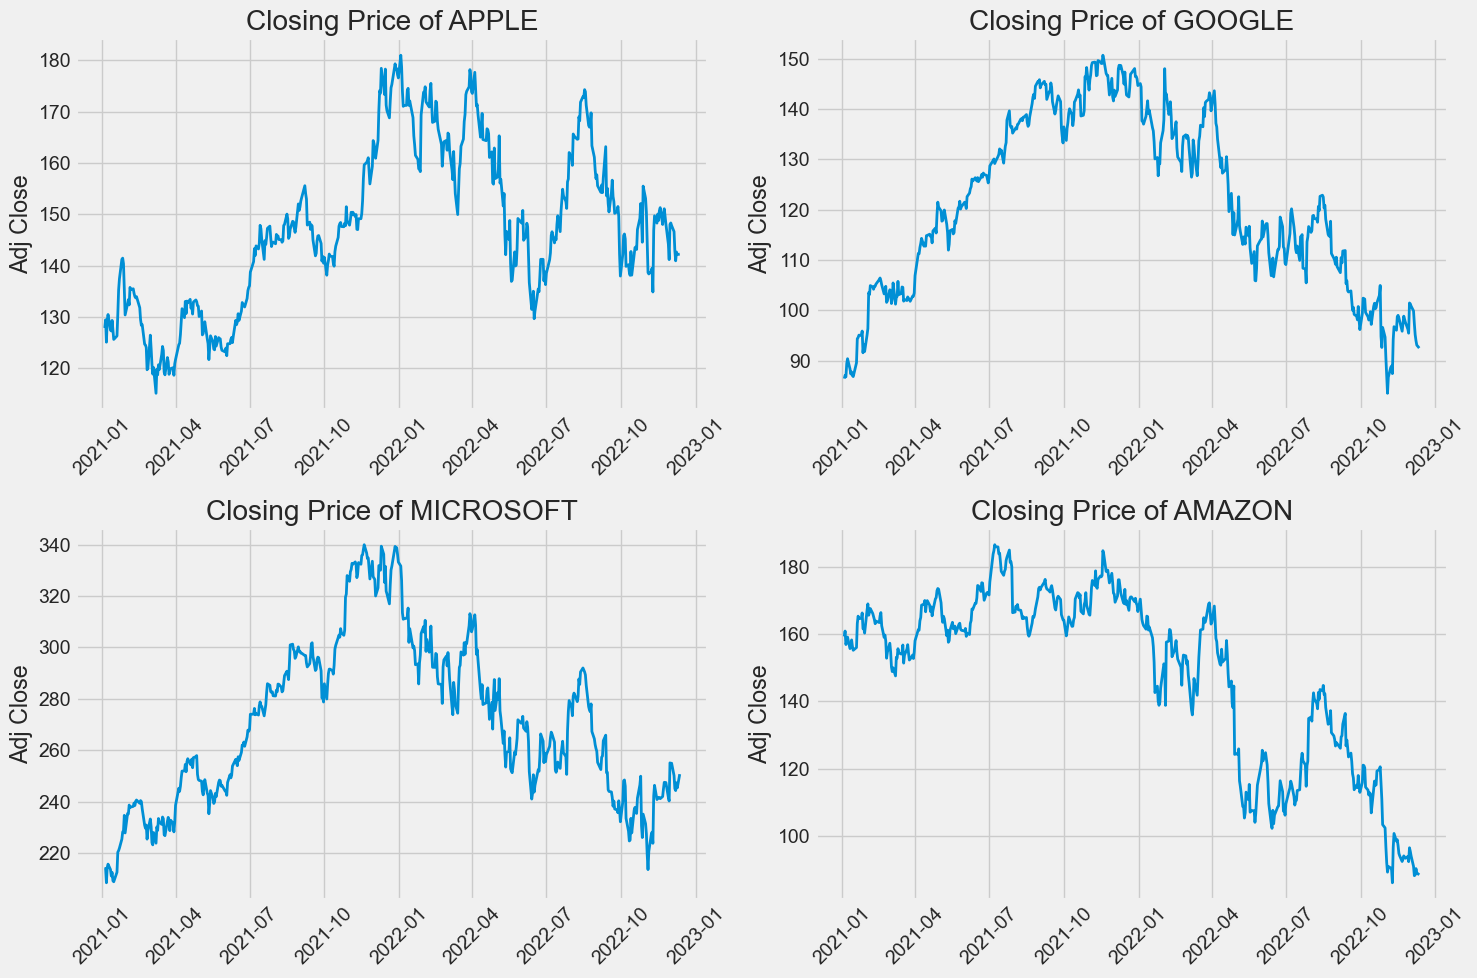

In [20]:
# closing price

plt.figure(figsize=(15, 10))
# plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list):
    plt.subplot(2, 2, i+1) # i should be >= 1 not 0
    plt.plot(company['Date'], company['Adjusted Close'], linewidth=2.0) # x, y order
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.xticks(rotation=45)
    plt.title(f'Closing Price of {company_name[i]}')

plt.tight_layout() # this preventing overlapping xtick etc...

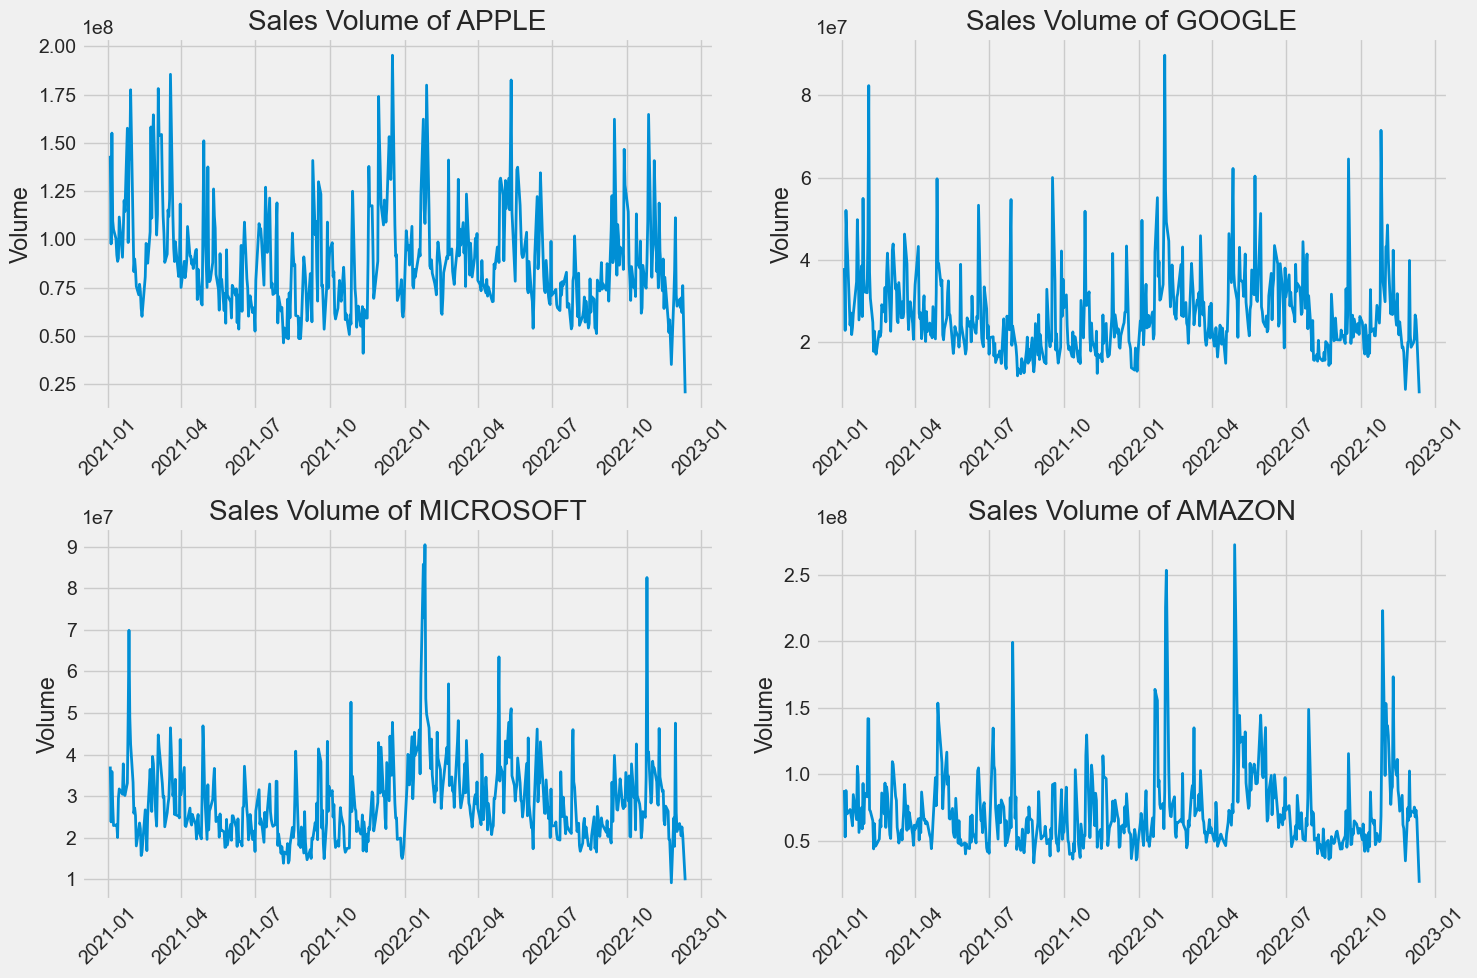

In [19]:
# Volume of Sales

plt.figure(figsize=(15, 10))
# plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list):
    plt.subplot(2, 2, i+1) # i should be >= 1 not 0
    plt.plot(company['Date'], company['Volume'], linewidth=2.0) # x, y order
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.xticks(rotation=45)
    plt.title(f'Sales Volume of {company_name[i]}')

plt.tight_layout()

### Moving Average

In [10]:
# Addition of moving average (MA) line
# 선호하는 거래 방식이나 분석 방식에 따라 MA는 입 맛에 맞게 조정하면 됨.

ma_day = [10, 20, 60, 120]

for ma in ma_day:
    for company in company_list:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adjusted Close'].rolling(ma).mean()

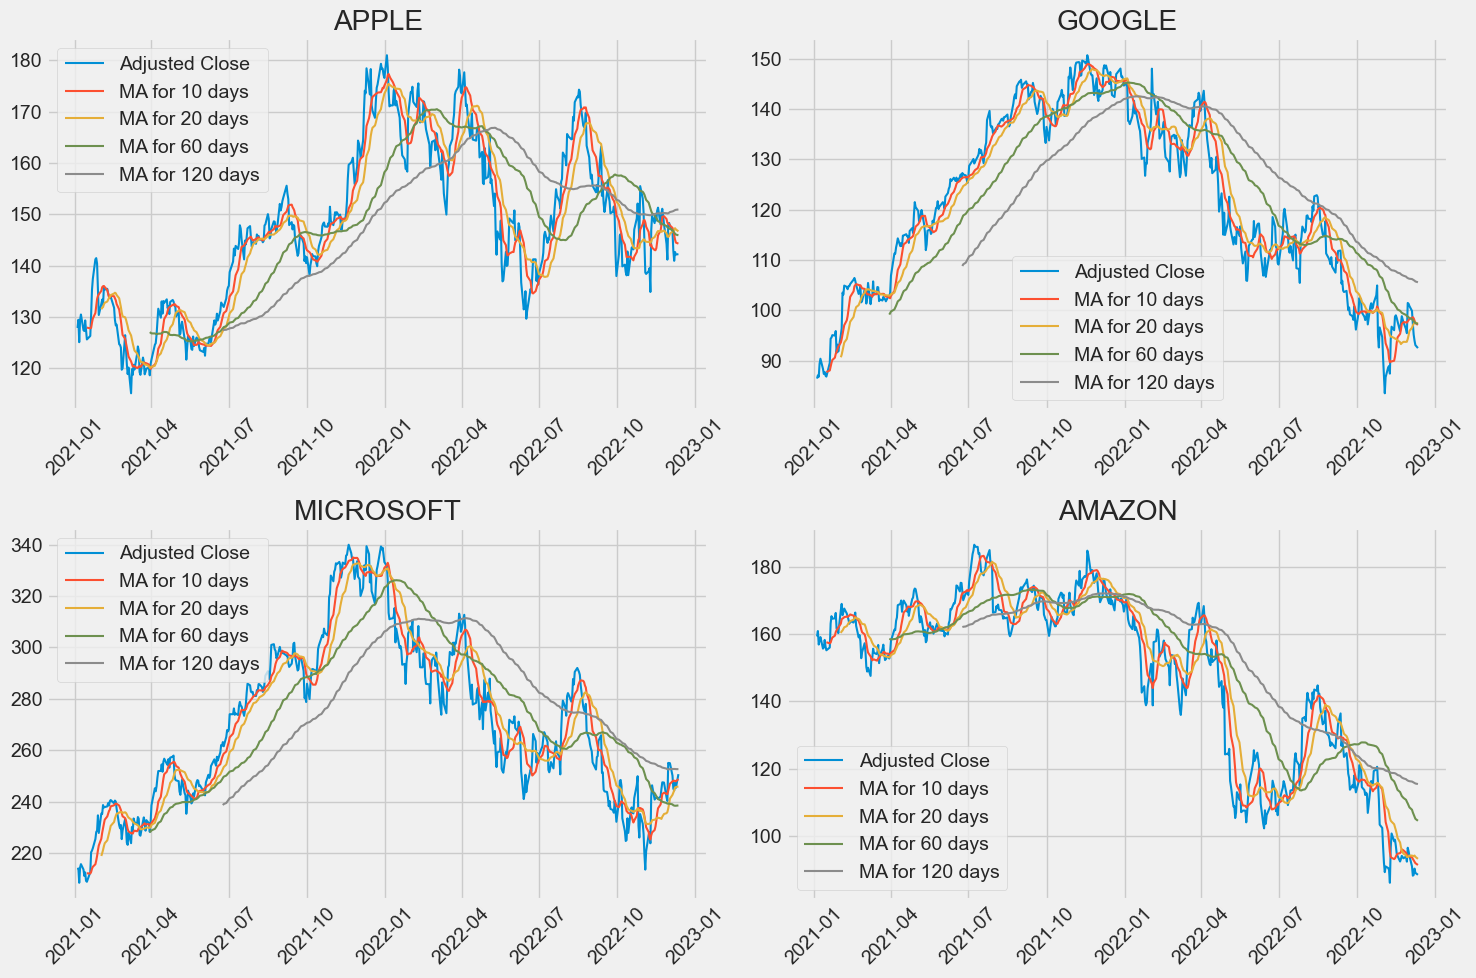

In [18]:
# MA with adjusted close lines on graphs

plt.figure(figsize=(15, 10))
# plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list):
    plt.subplot(2, 2, i+1) # i should be >= 1 not 0, or I can add start = 1 in enumerate() on line 6
    plt.plot(company['Date'], company[['Adjusted Close', 'MA for 10 days', 'MA for 20 days', 'MA for 60 days', 'MA for 120 days']],
             linewidth=1.5)
    plt.xticks(rotation=45)
    plt.legend(['Adjusted Close', 'MA for 10 days', 'MA for 20 days', 'MA for 60 days', 'MA for 120 days'])
    plt.title(f'{company_name[i]}')

plt.tight_layout()

### Daily Return

In [22]:
# Addition of percent change on data

for company in company_list:
    company['Daily Return'] = company['Adjusted Close'].pct_change()

In [46]:
# for further use, set 'Date' as index

for company in company_list:
    company.set_index('Date', drop=True, inplace=True)

In [49]:
# Data Check - Apple

company_list[0]

,Low,Open,Volume,High,Close,Adjusted Close,company_name,MA for 10 days,MA for 20 days,MA for 60 days,MA for 120 days,Daily Return
Date,,,,,,,,,,,,
2021-01-04,126.760002,133.520004,143301900,133.610001,129.410004,127.874954,APPLE,NaN,NaN,NaN,NaN,NaN
2021-01-05,128.429993,128.889999,97664900,131.740005,131.009995,129.455948,APPLE,NaN,NaN,NaN,NaN,0.012364
2021-01-06,126.379997,127.720001,155088000,131.050003,126.599998,125.098274,APPLE,NaN,NaN,NaN,NaN,-0.033661
2021-01-07,127.860001,128.360001,109578200,131.630005,130.919998,129.367035,APPLE,NaN,NaN,NaN,NaN,0.034123
2021-01-08,130.229996,132.429993,105158200,132.630005,132.050003,130.483627,APPLE,NaN,NaN,NaN,NaN,0.008631
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-06,141.919998,147.070007,64727200,147.300003,142.910004,142.910004,APPLE,146.844000,146.825498,146.632110,150.622432,-0.025370
2022-12-07,140.000000,142.190002,69721100,143.369995,140.940002,140.940002,APPLE,145.920001,146.897498,146.421356,150.716394,-0.013785
2022-12-08,141.100006,142.360001,62128300,143.520004,142.649994,142.649994,APPLE,145.078000,147.286498,146.214643,150.812145,0.012133


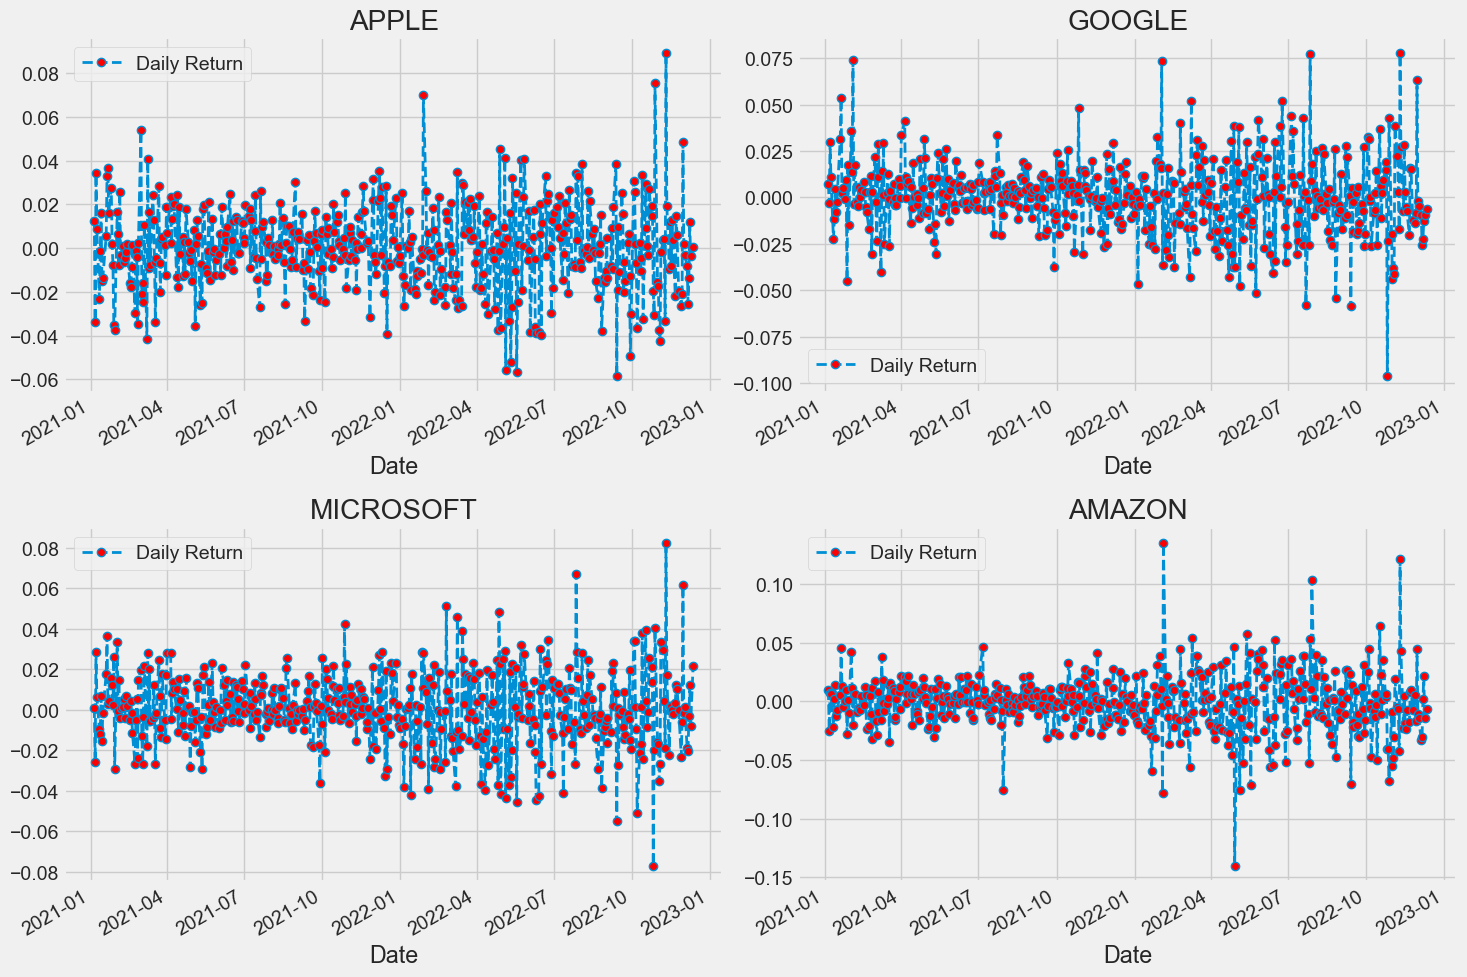

In [48]:
# plot graphs

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--',
                          marker='o', linewidth=2.0, markerfacecolor='red')
axes[0, 0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', 
                          marker='o', linewidth=2.0, markerfacecolor='red')
axes[0, 1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', 
                          marker='o', linewidth=2.0, markerfacecolor='red')
axes[1, 0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', 
                          marker='o', linewidth=2.0, markerfacecolor='red')
axes[1, 1].set_title('AMAZON')

fig.tight_layout()

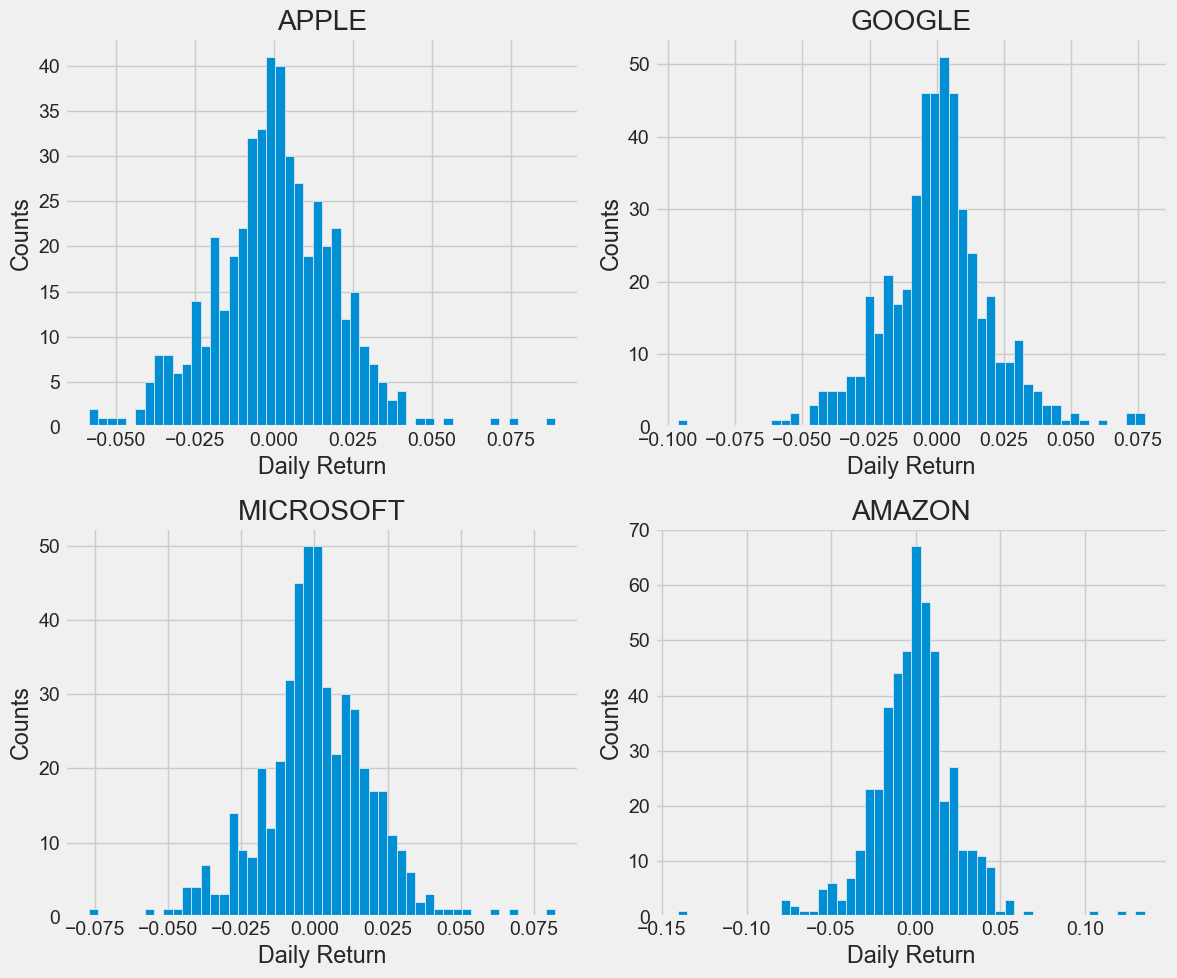

In [55]:
# Histograms to see distribution of daily return
# this can be 1 of many tools to manage risk on investment

plt.figure(figsize=(12, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    # company['Daily Return'].plot(kind='kde', color='r', linestyle='--', linewidth=2.0) >> to show line graph
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i-1]}')

plt.tight_layout()

### Correlation between different stocks on Daily Return / Closing Price

In [64]:
# daily return을 이용해 각 주식이 연관성이 있는지를 보는 것
# A 회사와 B 회사의 관계를 얼추 볼 수 있으나, 그 사이에 C 회사가 관련되어 있을 수도 있고 (A-C-B) 다양한 가능성이 있으니 직접적인 관계가 있다는 속단은 금물
# 먼저 daily return / adj close만 각각 추출 및 concat

a = AAPL[['Daily Return']]
b = GOOG[['Daily Return']]
c = MSFT[['Daily Return']]
d = AMZN[['Daily Return']]

dr_df = pd.concat([a, b, c, d], axis=1)
dr_df.columns = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

a = AAPL[['Adjusted Close']]
b = GOOG[['Adjusted Close']]
c = MSFT[['Adjusted Close']]
d = AMZN[['Adjusted Close']]

cp_df = pd.concat([a, b, c, d], axis=1)
cp_df.columns = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

display(dr_df, cp_df)

,APPLE,GOOGLE,MICROSOFT,AMAZON
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,0.012364,0.007337,0.000965,0.010004
2021-01-06,-0.033661,-0.003234,-0.025929,-0.024897
2021-01-07,0.034123,0.029943,0.028457,0.007577
2021-01-08,0.008631,0.011168,0.006093,0.006496
...,...,...,...,...
2022-12-06,-0.025370,-0.025633,-0.020304,-0.030326
2022-12-07,-0.013785,-0.022197,-0.003060,0.002380
2022-12-08,0.012133,-0.012612,0.012399,0.021366


,APPLE,GOOGLE,MICROSOFT,AMAZON
Date,,,,
2021-01-04,127.874954,86.412003,213.876358,159.331497
2021-01-05,129.455948,87.045998,214.082703,160.925507
2021-01-06,125.098274,86.764503,208.531647,156.919006
2021-01-07,129.367035,89.362503,214.465836,158.108002
2021-01-08,130.483627,90.360497,215.772552,159.134995
...,...,...,...,...
2022-12-06,142.910004,97.309998,245.119995,88.250000
2022-12-07,140.940002,95.150002,244.369995,88.459999
2022-12-08,142.649994,93.949997,247.399994,90.349998


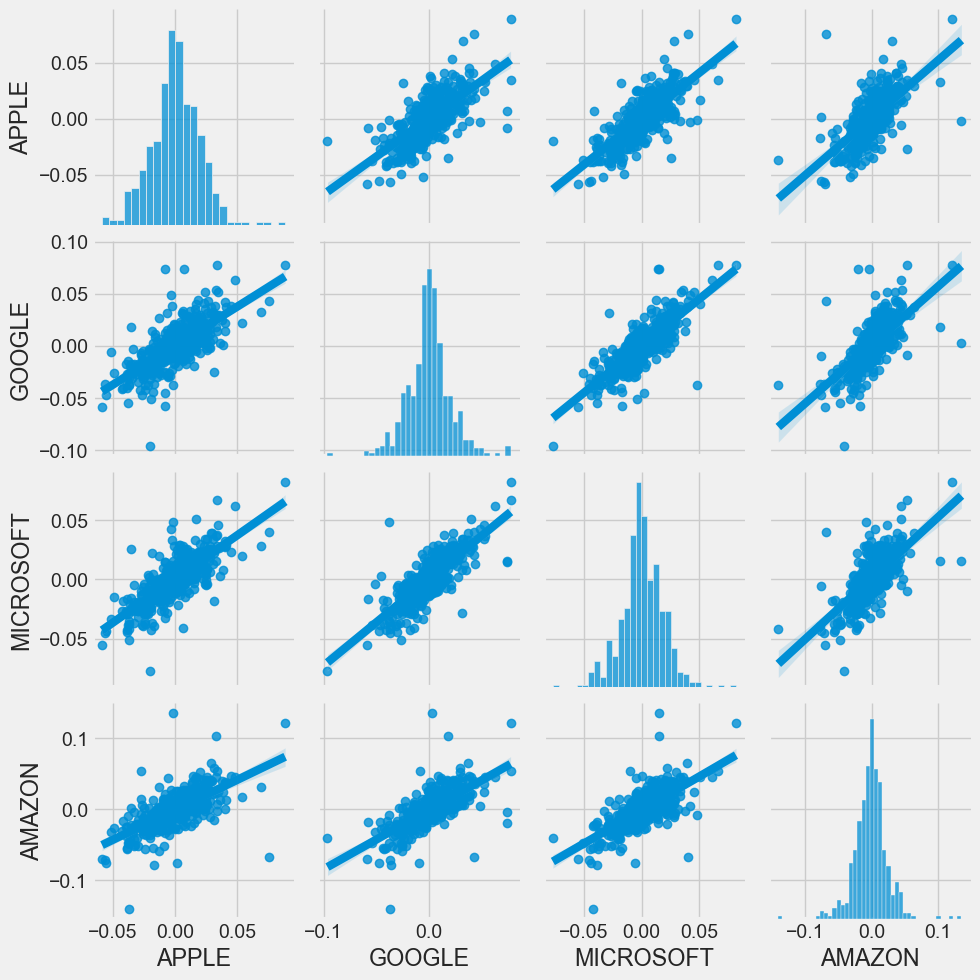

In [62]:
# pairplot을 통한 각 회사 수익률 연관성 확인
# 두 개의 회사만 1:1로 비교하고 싶다면, sns.joinplot(x='', y='', data= ,kind ='scatter') 사용

sns.pairplot(dr_df, kind='reg')

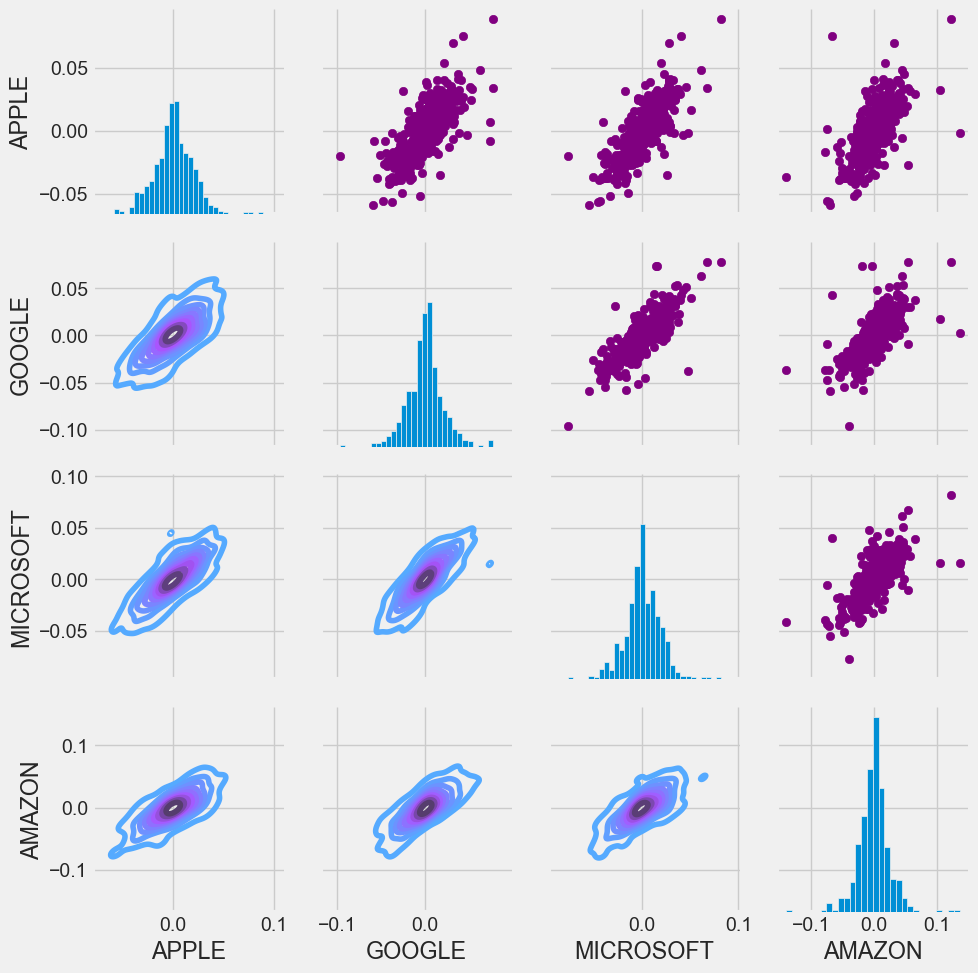

In [63]:
# sns.PairGrid()를 사용하면 다양한 연출이 가능함
# sns.PairGrid()를 활용한 Daily Return 연관도 그래프들

return_fig = sns.PairGrid(dr_df.dropna())

return_fig.map_upper(plt.scatter, color='purple') # 대각선 위 그래프 scatter 그래프화

return_fig.map_lower(sns.kdeplot, cmap='cool_d') # 대각선 아래 그래프 kdeplot 화

return_fig.map_diag(plt.hist, bins=30) # 대각선 그래프 histogram 화

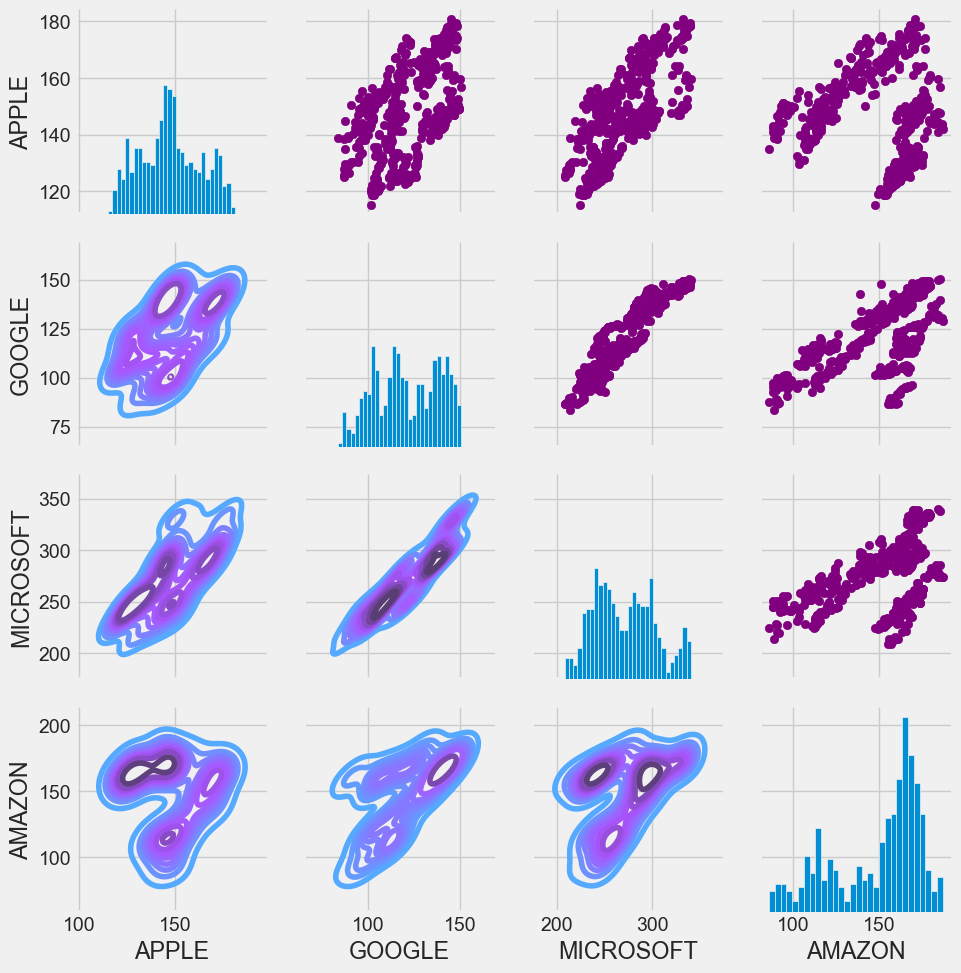

In [65]:
# sns.PairGrid()를 사용하면 다양한 연출이 가능함
# sns.PairGrid()를 활용한 Adj Close 연관도 그래프들

return_fig = sns.PairGrid(cp_df.dropna())

return_fig.map_upper(plt.scatter, color='purple') # 대각선 위 그래프 scatter 그래프화

return_fig.map_lower(sns.kdeplot, cmap='cool_d') # 대각선 아래 그래프 kdeplot 화

return_fig.map_diag(plt.hist, bins=30) # 대각선 그래프 histogram 화

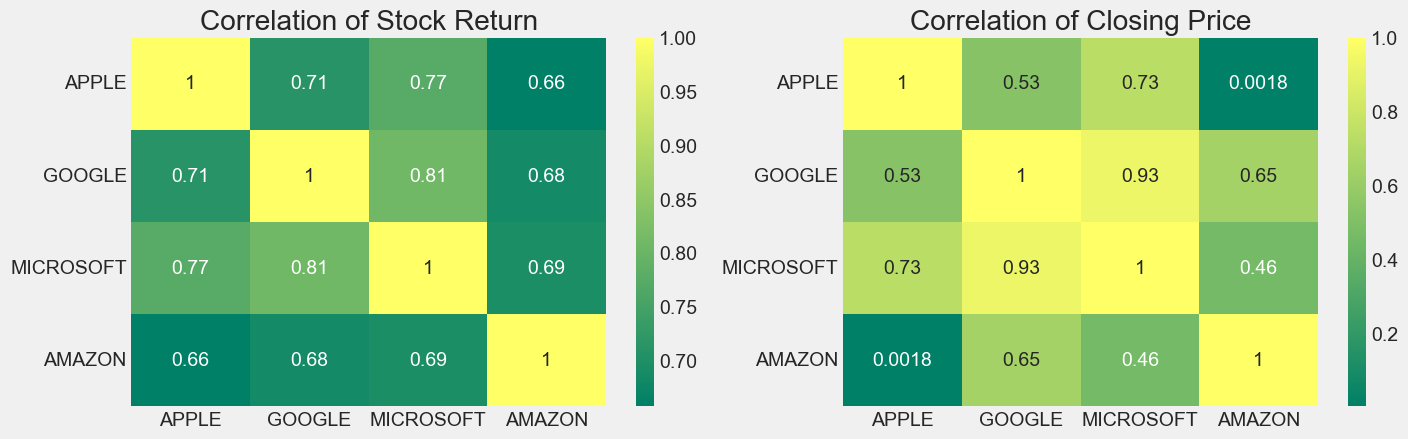

In [67]:
# 상관관계 그래프

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.heatmap(dr_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Return')

plt.subplot(2, 2, 2)
sns.heatmap(cp_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of Closing Price')

plt.show()

* 절대값 0.4 이상만 되어도 꽤나 연관성이 있다고 보는데, 종가에서의 Apple과 Amazon을 제외하면 서로 연관성이 꽤 높은 것을 볼 수 있음
* 그러나 상관관계표는 모든 것을 말해주지 않으므로, 제 3 인자 존재 가능성과 단순 시장의 흐름에 인함을 배제하면 안됨. <br>
  (금리 변동, 정책 변경 등 모든 주가가 대체로 영향을 받는 부분...)

### Risk

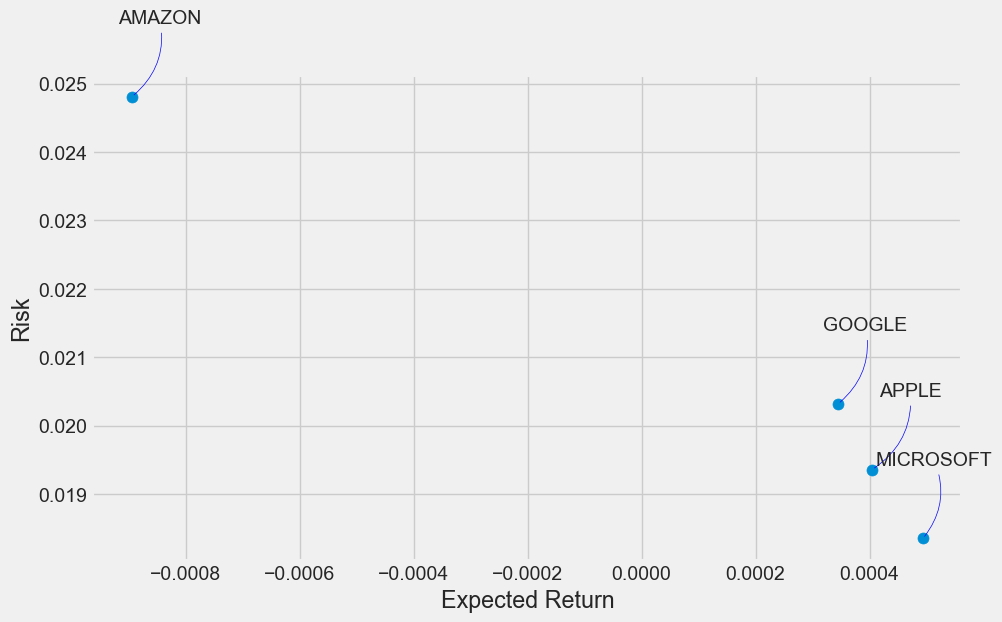

In [72]:
# daily return의 평균 값과 표준편차를 이용해 간단한 위험도 파악

dr_df2 = dr_df.dropna() # daily return은 첫번째 행이 NaN이므로 dropna 필수

area = np.pi*20 # marker size

plt.figure(figsize=(10, 6))
plt.scatter(dr_df2.mean(), dr_df2.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(dr_df2.columns, dr_df2.mean(), dr_df2.std()): # annotation design
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha = 'right',
                 va='bottom', arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3, rad=-0.3'))
plt.show()

* 예상 수익: 전체 일 수익률의 평균
* 예상 위험도: 전체 일 수익률의 표준편차
* 단순 평균과 표준편차만 이용하였기에 신뢰도가 높은 정보는 아니겠으나, 현 주식시장에서 사용되는 다양한 계산법이나 지표가 응용가능함
  - 다른 계산법을 이용하여 그래프로 보이면 비교나 설득면에서 유용